In [1]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=a80d3690dd3de6c29b2a57a504f319750ed87e8b00546336026e02b98a71030f
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
import pandas as pd

In [3]:
from sentence_transformers import SentenceTransformer, util,evaluation

In [6]:
resume = pd.read_csv("/content/resume_Job (1).csv")

**pre-processing of data**

In [7]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resume['Resume'] = resume.Resume.apply(lambda x: cleanResume(x))
resume['Job_description'] = resume.Job_description.apply(lambda x: cleanResume(x))

In [8]:
resume

,Category,Resume,Job_description
0,Data Science,Education Details May 2013 to May 2017 B E UI...,Job Description for Data Scientist Position E...
1,Data Science,Areas of Interest Deep Learning Control Syste...,1 Job Description for Electrical and Electron...
2,Data Science,Education Details MCA YMCAUST Faridabad Harya...,2 Job Description for Data Science Intern Pos...
3,Data Science,SKILLS C Basics IOT Python MATLAB Data Scienc...,3 Job Description for Data Science and Techno...
4,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visual...,4 Job Description for Data Science Consultant...
5,Data Science,Personal Skills â¢ Ability to quickly grasp ...,5 Job Description for Data Science Specialist...
6,HR,TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢...,6 Job Description for Human Resource and Fina...
7,HR,I T Skills â¢ Windows XP Ms Office Word Exce...,7 Job Description for Human Resource Manageme...
8,HR,Education Details BA mumbai University HR Ski...,8 Job Description for HR Operations Position ...
9,HR,Education Details June 2012 to May 2015 B A E...,9 Job Description for HR Position Education B...


In [9]:
resume_list = resume['Resume'].values.tolist()
job_list = resume['Job_description'].values.tolist()


**Import model from hugging face**

In [10]:
model = SentenceTransformer('multi-qa-distilbert-cos-v1')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/737 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.47k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/523 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [13]:

qid_list = ["qid" + str(i) for i in range(26)]

In [15]:
queries = {key: job_list[i] for key, i in zip(qid_list, range(26))}


In [16]:

cid_list = ["cid" + str(i) for i in range(26)]


In [17]:
corpus = {key: resume_list[i] for key, i in zip(cid_list, range(26))}


In [18]:
relevant_docs = {"qid0": {"cid0","cid1","cid2","cid3","cid4","cid5"},
                 "qid1": {"cid1","cid0","cid2","cid3","cid4","cid5"},
                 "qid2": {"cid2","cid1","cid0","cid3","cid4","cid5"},
                 "qid3": {"cid3","cid1","cid2","cid0","cid4","cid5"},
                 "qid4": {"cid4","cid1","cid2","cid3","cid0","cid5"},
                 "qid5": {"cid5","cid1","cid2","cid3","cid4","cid0"},
                 "qid6": {"cid6","cid7","cid8","cid9","cid10","cid11","cid12","cid13","cid14","cid15"},
                 "qid7": {"cid7","cid6","cid8","cid9","cid10","cid11","cid12","cid13","cid14","cid15"},
                 "qid8": {"cid8","cid7","cid6","cid9","cid10","cid11","cid12","cid13","cid14","cid15"},
                 "qid9": {"cid9","cid7","cid8","cid6","cid10","cid11","cid12","cid13","cid14","cid15"},
                 "qid10": {"cid10","cid7","cid8","cid9","cid6","cid11","cid12","cid13","cid14","cid15"},
                 "qid11": {"cid11","cid7","cid8","cid9","cid10","cid6","cid12","cid13","cid14","cid15"},
                 "qid12": {"cid12","cid7","cid8","cid9","cid10","cid11","cid6","cid13","cid14","cid15"},
                 "qid13": {"cid13","cid7","cid8","cid9","cid10","cid11","cid12","cid6","cid14","cid15"},
                 "qid14": {"cid14","cid7","cid8","cid9","cid10","cid11","cid12","cid13","cid6","cid15"},
                 "qid15": {"cid15","cid7","cid8","cid9","cid10","cid11","cid12","cid13","cid14","cid6"},
                 "qid16": {"cid16","cid17","cid18","cid19","cid20"},
                 "qid17": {"cid17","cid16","cid18","cid19","cid20"},
                 "qid18": {"cid18","cid17","cid16","cid19","cid20"},
                 "qid19": {"cid19","cid17","cid18","cid16","cid20"},
                 "qid20": {"cid20","cid17","cid18","cid19","cid16"},
                 "qid21": {"cid21","cid22","cid23"},
                 "qid22": {"cid22","cid21","cid23"},
                 "qid23": {"cid23","cid22","cid21"},
                 "qid24": {"cid24","cid25"},
                 "qid25": {"cid25","cid24"}

                 }
# for qid, cid in zip(qid_list, cid_list):
#     relevant_docs[qid] = {cid}

Evaluate

In [19]:

evaluator = evaluation.InformationRetrievalEvaluator(queries, corpus, relevant_docs,show_progress_bar=True)
model.evaluate(evaluator)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Corpus Chunks: 100%|██████████| 1/1 [00:34<00:00, 34.70s/it]


0.8511660835623256

**Test**

In [20]:
corpus_embeddings = model.encode(resume_list, convert_to_tensor=True)
query_embedding = model.encode(job_list, convert_to_tensor=True)
similar_sentences = util.semantic_search(query_embedding, corpus_embeddings ,top_k=5)


In [23]:
for item in similar_sentences:
    for pair in item:
        print(f"corpus_id: {pair['corpus_id']}, score: {pair['score']}")
    print('---------------------------------')

corpus_id: 0, score: 0.8161970376968384
corpus_id: 3, score: 0.5713692903518677
corpus_id: 5, score: 0.5563461780548096
corpus_id: 4, score: 0.5399575233459473
corpus_id: 2, score: 0.529228687286377
---------------------------------
corpus_id: 1, score: 0.7482649087905884
corpus_id: 5, score: 0.633083164691925
corpus_id: 4, score: 0.6044949889183044
corpus_id: 25, score: 0.5920940637588501
corpus_id: 15, score: 0.5874097943305969
---------------------------------
corpus_id: 2, score: 0.7193389534950256
corpus_id: 3, score: 0.5384926795959473
corpus_id: 15, score: 0.5304765701293945
corpus_id: 7, score: 0.5263130068778992
corpus_id: 4, score: 0.5060520172119141
---------------------------------
corpus_id: 3, score: 0.8552553057670593
corpus_id: 15, score: 0.6715937852859497
corpus_id: 2, score: 0.6297195553779602
corpus_id: 5, score: 0.6251259446144104
corpus_id: 14, score: 0.6034092307090759
---------------------------------
corpus_id: 4, score: 0.886172890663147
corpus_id: 25, score: 

**Reference:**
www.sbert.net   

**paper:**


Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks

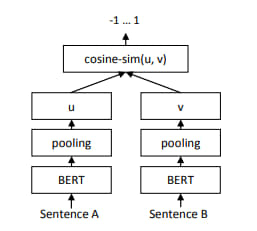